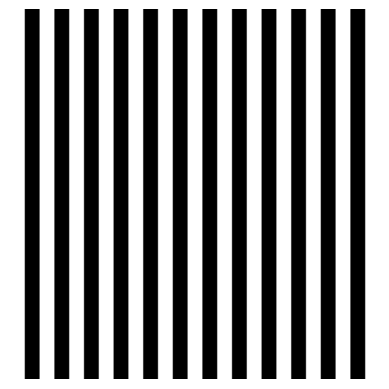

In [1]:
# Никишев И,О. 224-321
import numpy as np
import cv2, matplotlib.pyplot as plt, numpy as np, math
def a(a):
    plt.axis('off')
    plt.imshow(a, cmap='gray', vmin=0, vmax=255)
def periodic_rectangular_signal(width, height, rect_width):
    single = [255]*rect_width + [0] * rect_width
    line = (single * (width//rect_width))[:width]
    return np.array([line]*height)
img = periodic_rectangular_signal(200, 200, 8)
a(img)

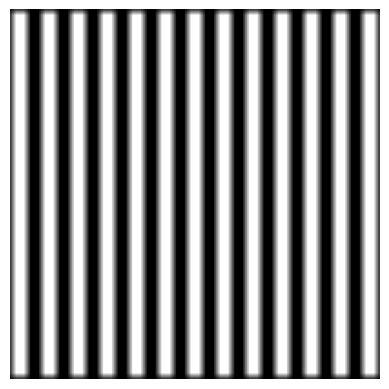

In [2]:
def linear(x, y):
    return np.ones(shape=(y, x))/(y*x)
from scipy.signal import convolve2d
img_linear44 = convolve2d(img, linear(4, 4))
a(img_linear44)

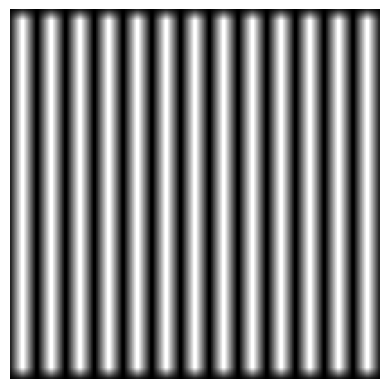

In [3]:
img_linear77 = convolve2d(img, linear(7, 7))
a(img_linear77)

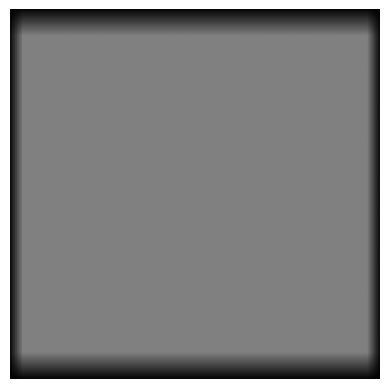

In [4]:
img_linear1616 = convolve2d(img, linear(16,16))
a(img_linear1616)

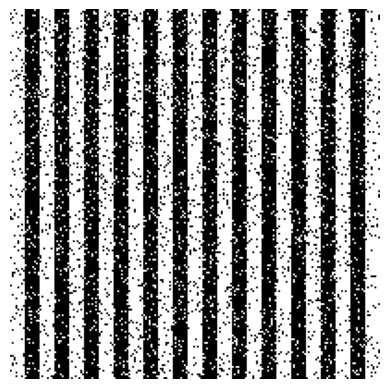

In [5]:
def add_impulse_noise(image, fraction):
    import random
    count = int(image.size * fraction)
    y, x = image.shape
    for i in range(count):
        yp = random.randrange(0, y)
        xp = random.randrange(0, x)
        image[yp, xp] = 255 - image[yp, xp]
    return image
impulse = add_impulse_noise(img.copy(), 0.1)
a(impulse)

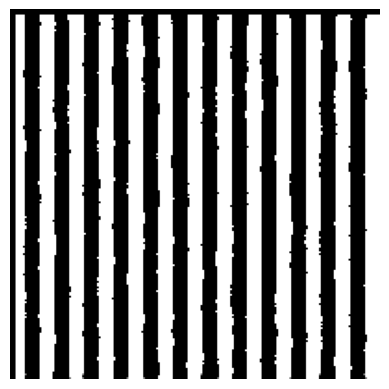

In [6]:
def median(image, kwidth, khight):
    w = kwidth//2
    h = khight//2
    r = np.zeros(image.shape)
    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            if y<h or x<w: continue
            values = image[y-h:y+h+1, x-w:x+w+1]
            r[y,x] = np.median(values)
    return r
img_median = median(impulse.copy(), 7, 7)
a(img_median)

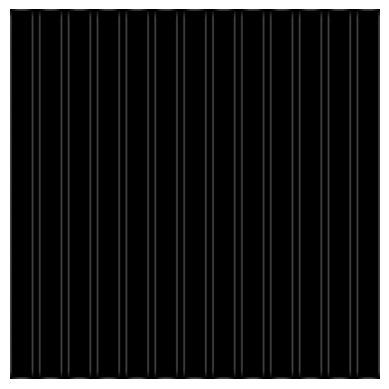

In [7]:
laplace = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
img_laplace = convolve2d(img_linear44.copy(), laplace)
a(img_laplace)

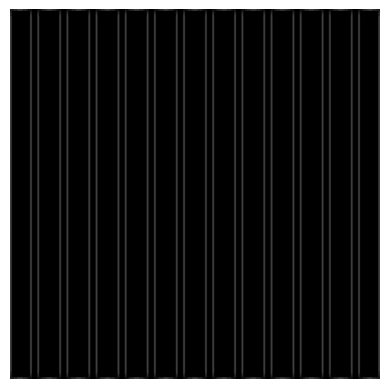

In [8]:
from scipy.ndimage import laplace # Для подтверждения результата он сравнивается с функцией Laplace из библиотеки scipy.ndimage 
a(laplace(img_linear44.copy()))